# Analyze of results


In this notebook, we will analyze the results of the experiment

#1 Load library

In [5]:
from google.colab import drive
drive.mount('/content/drive')

repo = "/content/drive/MyDrive/Dissertation/MyWork/Dataset/" #will be useful to loop over the files later on.

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
from torchvision import transforms, datasets, models
from PIL import Image
import random
import seaborn as sns


#2 Image result

Some code to call our single or multiple result pictures

single image

In [ ]:
# black background   6255 double cell 412 / 9113  9333

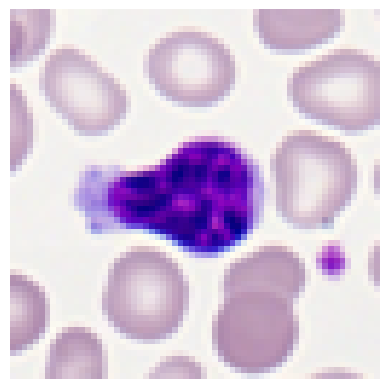

In [6]:
Img_id = 9591
Img = cv2.imread(repo + "TestBC/Sample_" + str(Img_id) + ".tiff")
# Img = cv2.imread(repo + "Blood_Cancer/Sample_" + str(Img_id) + ".tiff")
plt.axis('off')
plt.imshow(Img[:, :, ::-1])
plt.show()



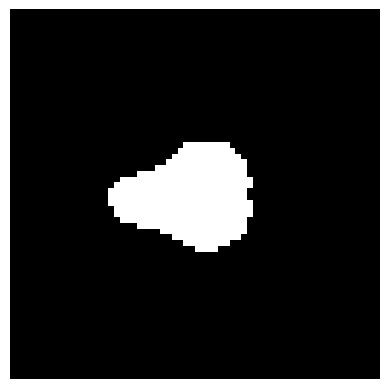

In [7]:
Img_gt = cv2.imread(repo + "TestGT/Sample_" + str(Img_id) + "_gt.png")
# Img_gt = cv2.imread(repo + "GT/Sample_" + str(Img_id) + "_gt.png")
# gray_image = cv2.cvtColor(Img_gt, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(Img_gt)
plt.show()


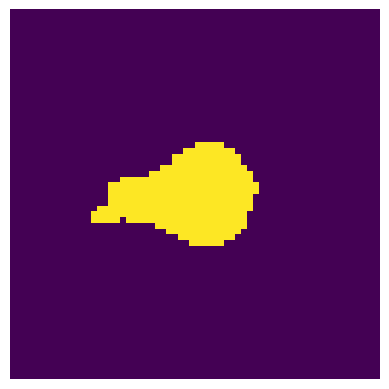

In [40]:
Img_pre = cv2.imread(repo + "TestPRE/Sample_" + str(Img_id) + "_pre.png")
# Img_pre = cv2.imread(repo + "GT/Sample_" + str(Img_id) + "_gt.png")
# gray_image = cv2.cvtColor(Img_pre, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(cv2.cvtColor(Img_pre, cv2.COLOR_RGB2GRAY))
plt.show()


In [42]:
intersection = np.logical_and(Img_gt, Img_pre)
union = np.logical_or(Img_gt, Img_pre)
iou = np.sum(intersection) / np.sum(union)
iou

0.8782608695652174

multiple images

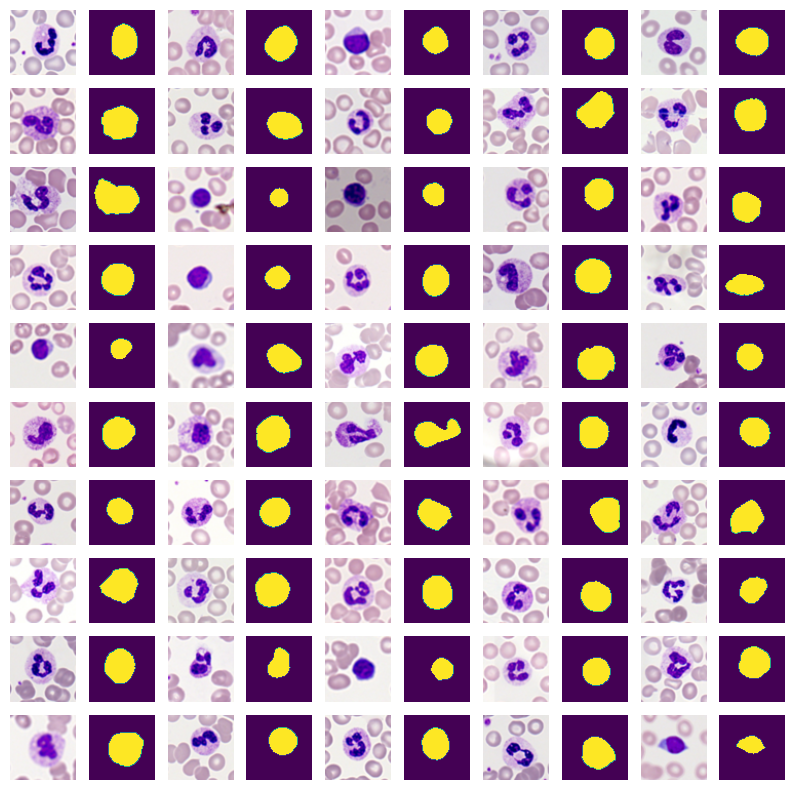

In [6]:
random_img = random.sample(range(1, 9000), 50)

plt.figure(figsize=(10,10))
for i, item in enumerate(random_img):
    # 取图片
    img_tmp = cv2.imread(repo + "Blood_Cancer/Sample_" + str(item) + ".tiff")
    stained_ground = cv2.imread(repo + "GT/Sample_" + str(item) + "_gt.png")

    plt.subplot(10, 10, 2*i + 1)
    plt.imshow(img_tmp[:, :, ::-1])
    plt.axis('off')
    plt.subplot(10, 10, 2*i + 2)
    plt.imshow(cv2.cvtColor(stained_ground, cv2.COLOR_RGB2GRAY))
    plt.axis('off')
# plt.subplots_adjust(wspace=0.1, hspace= -0.1)
plt.show()

#3 Prediction analyze

Calculate IoU

In [ ]:
# repo + "TestGT/Sample_" + str(Img_id) + "_gt.png"

gt_folder = repo + "TestGT/"
pred_folder = repo + "TestPRE/"

gt_files = sorted(os.listdir(gt_folder))
pred_files = sorted(os.listdir(pred_folder))

ious = []
image_ids = range(9001, 10001)
# image_ids = range(9001, 9011)
for image_id in image_ids:

    gt_file = f"Sample_{image_id}_gt.png"
    pred_file = f"Sample_{image_id}_pre.png"

    gt_path = os.path.join(gt_folder, gt_file)
    pred_path = os.path.join(pred_folder, pred_file)

    # 读取图像
    gt_img = cv2.imread(gt_path)
    pred_img = cv2.imread(pred_path)

    # 计算交并比（IoU）
    intersection = np.logical_and(gt_img, pred_img)
    union = np.logical_or(gt_img, pred_img)
    iou = np.sum(intersection) / np.sum(union)

    ious.append(iou)

    np.savetxt(repo + 'ious.txt', ious, fmt = '%f')


In [13]:
ious = np.loadtxt(repo + 'ious.txt').tolist()

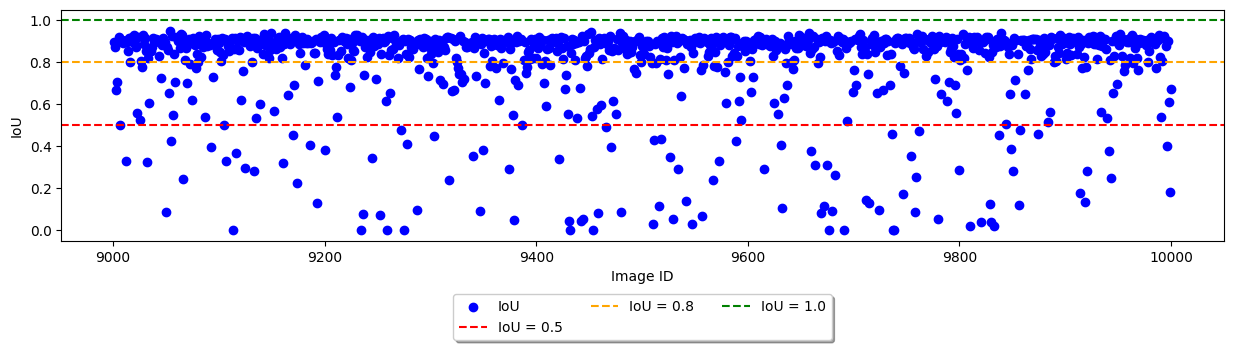

In [7]:
image_ids = range(9001, 10001)
plt.figure(figsize=(15,3))
plt.scatter(image_ids, ious, c='b', marker='o', label='IoU')
plt.axhline(y=0.5, color='r', linestyle='--', label='IoU = 0.5')
plt.axhline(y=0.8, color='orange', linestyle='--', label='IoU = 0.8')
plt.axhline(y=1.0, color='g', linestyle='--', label='IoU = 1.0')


plt.xlabel('Image ID')
plt.ylabel('IoU')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)
plt.show()


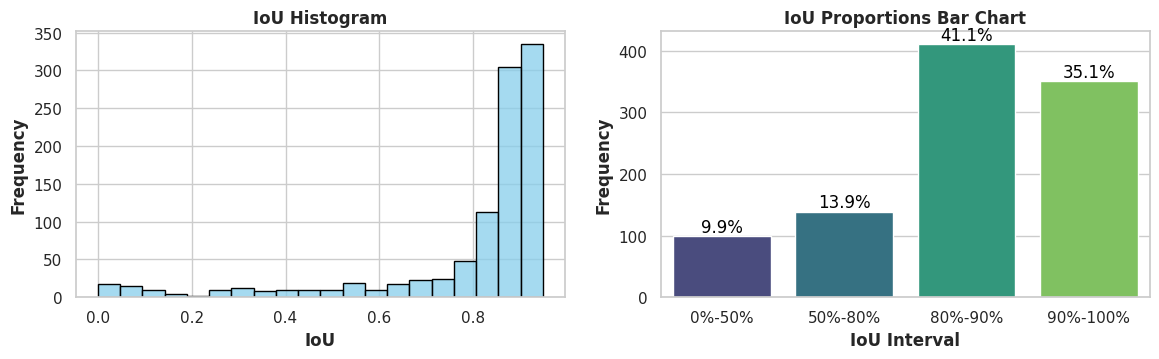

In [46]:
intervals = [0.5, 0.8, 0.9, 1.0]
interval_counts = [0, 0, 0, 0]

for iou in ious:
    if iou < intervals[0]:
        interval_counts[0] += 1
    elif iou < intervals[1]:
        interval_counts[1] += 1
    elif iou < intervals[2]:
        interval_counts[2] += 1
    else:
        interval_counts[3] += 1

# set Seaborn
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(ious, bins=20, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('IoU', weight='bold')
axes[0].set_ylabel('Frequency', weight='bold')
axes[0].set_title('IoU Histogram', weight='bold')

# set color
colors = sns.color_palette("viridis", n_colors=len(intervals))

barplot = sns.barplot(x=intervals, y=interval_counts, palette=colors, ax=axes[1])
axes[1].set_xlabel('IoU Interval', weight='bold')
axes[1].set_ylabel('Frequency', weight='bold')
axes[1].set_title('IoU Proportions Bar Chart', weight='bold')
axes[1].set_xticks(range(len(intervals)))
axes[1].set_xticklabels(['0%-50%', '50%-80%', '80%-90%', '90%-100%'])

# write proportions
for i, count in enumerate(interval_counts):
    barplot.text(i, count + 0.5, str(count/10)+"%", ha='center', va='bottom', color='black')

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show()
